This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [132]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = ''

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [133]:
# First, import the relevant modules
import requests
import collections

In [134]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
r = requests.get("https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-02&end_date=2017-12-31&api_key=")

In [135]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
print(r.json())

{'dataset': {'id': 10095370, 'dataset_code': 'AFX_X', 'database_code': 'FSE', 'name': 'Carl Zeiss Meditec (AFX_X)', 'description': 'Stock Prices for Carl Zeiss Meditec (AFX) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 'refreshed_at': '2019-04-03T22:30:42.975Z', 'newest_available_date': '2019-04-03', 'oldest_available_date': '2000-06-07', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2017-01-02', 'end_date': '2017-12-31', 'data': [['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None], ['2017-12-28', 51.65, 51.82, 51.43, 51.6, None, 40660.0, 2099024.0, None, None, None], ['2017-12-27', 51.45, 51.89, 50.76, 51.82, None, 57452.0, 2957018.0, None, None, None], ['201

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [143]:
data = r.json()
type(data)

dict

In [144]:
print(data['dataset'].keys())

dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])


In [145]:
price = data['dataset']['data']

In [146]:
col = data['dataset']['column_names']

In [147]:
print(col)

['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']


Highest Opening Prices : 53.11
Lowest Opening Prices : 34.0


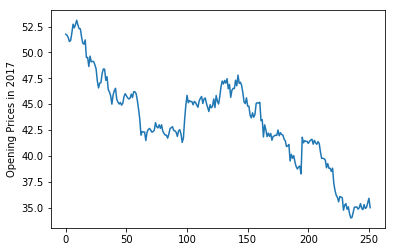

In [148]:
#3. Calculate what the highest and lowest opening prices were for the stock in this period.
#Extract opening prices
open = []
for i in range(len(price)):
    open.append(price[i][col.index('Open')])
    
max_open = max(x for x in open if x is not None)
min_open = min(x for x in open if x is not None)

print ("Highest Opening Prices : "+ str(max_open))
print ("Lowest Opening Prices : "+ str(min_open))

#Plot opening prices to check the above answer
import matplotlib.pyplot as plt
dummy = [x for x in open if x is not None]
plt.plot(dummy)
plt.ylabel('Opening Prices in 2017')
plt.show()

In [149]:
#4. What was the largest change in any one day (based on High and Low price)?
High = []
Low = []
for i in range(len(price)):
    High.append(price[i][col.index('High')])
    Low.append(price[i][col.index('Low')])
    
change = [i - j for i, j in zip(High, Low)]
max_change = max(x for x in change if x is not None)
print('Largest change in any one day based on High and Low price: ' + str(max_change))

Largest change in any one day based on High and Low price: 2.8100000000000023


In [150]:
#5. What was the largest change between any two days (based on Closing Price)?
#Extract Closing Price of each day
Close = []
for i in range(len(price)):
    Close.append(price[i][col.index('Close')])
    
twodaychange = [abs(Close[i+1]-Close[i]) for i in range(len(Close)-1)]
max_twodaychange = max(x for x in twodaychange if x is not None)
print('Largest change between any two days: ' + str(max_twodaychange))

Largest change between any two days: 2.559999999999995


In [151]:
#6. What was the average daily trading volume during this year?
#Extract daily trading volume
Vol = []
for i in range(len(price)):
    Vol.append(price[i][col.index('Traded Volume')])
    
none = Vol.count(None)
ave = sum(Vol)/(len(Vol)-none)
print('Average daily trading volume: ' + str(ave))

Average daily trading volume: 89124.33725490196


In [152]:
#7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)
vol2 = [x for x in Vol if x is not None]
vol2.sort()

l = len(vol2)

if l%2 == 0:
    median = (vol2[l/2]+vol2[l/2+1])/2
else:
    median = vol2[l//2+1]
    
print('Median trading volume: ' + str(median))
    

Median trading volume: 76600.0
